In [1]:
import nltk
from nltk.corpus import brown

import string

from sklearn.decomposition import PCA

import gensim
from gensim.models import Word2Vec

import matplotlib.pyplot as plt

## Load data

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/falcon/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
document = brown.sents()

In [4]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

## Preprocessing

### Text Cleaning

In [5]:
cleaned_doc = []
for doc in document:
    new_doc = []
    for word in doc:
        if word not in string.punctuation:
            new_doc.append(word.lower())

    if len(new_doc) > 0:
        cleaned_doc.append(new_doc)

In [6]:
len(cleaned_doc)

57219

## Word2vec (skip-gram)

In [7]:
model = Word2Vec(
    min_count=10,
    window=2,
    vector_size=300,
    negative=10,
    sg=1)

In [8]:
model.build_vocab(cleaned_doc)

In [9]:
model.train(cleaned_doc, total_examples=model.corpus_count, epochs=30, report_delay=1)

(20542653, 31031340)

In [10]:
model.wv.most_similar(positive=['car'])

[('tent', 0.40071386098861694),
 ('shayne', 0.38324272632598877),
 ('curb', 0.3810581862926483),
 ('cab', 0.3722327947616577),
 ('parked', 0.3719242811203003),
 ('plymouth', 0.36529740691185),
 ('hub', 0.3624212443828583),
 ('waving', 0.3608573079109192),
 ('mexicans', 0.3599471151828766),
 ('cars', 0.3545006215572357)]

In [11]:
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

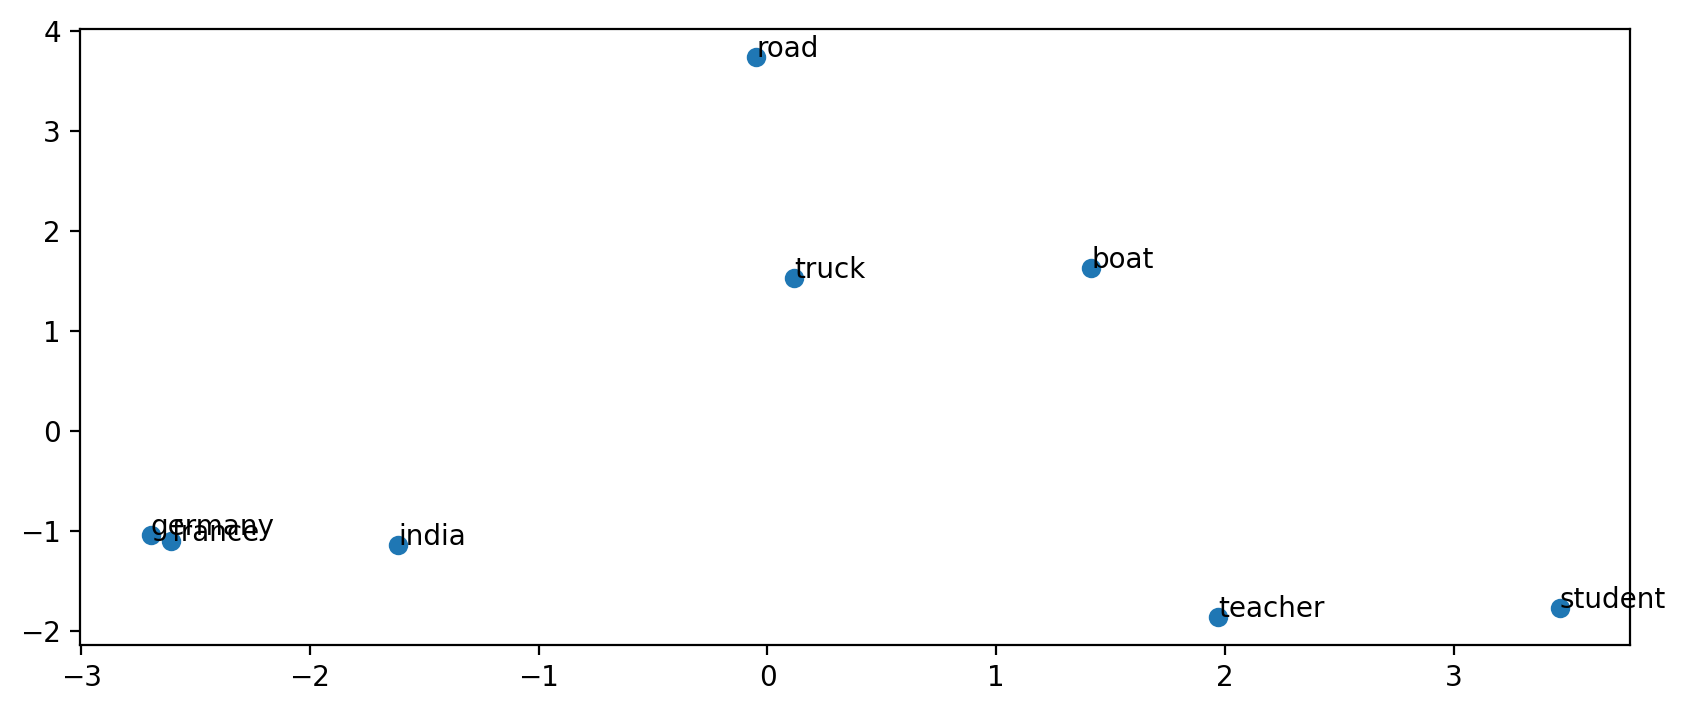

In [12]:
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(10, 4), dpi=200)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [13]:
print("3 words similar to car")
words = model.wv.most_similar("speed", topn=3)
for word in words:
  print(word)
print()

3 words similar to car
('speeds', 0.40087512135505676)
('aerator', 0.38268229365348816)
('gear', 0.3792440891265869)

